# Лабораторна робота №1 (бригада № 6)

Коефіцієнти: 

$a_0 = 0; a_1 = -0.045; a_2 = -0.079; a_3 = 0.525$


$b_1 = 0.3; b_2 = 0.4; b_3 = 0.3$

Імпорти:

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from time_series_generation import TimeSeries
from feature_generation import TimeSeriesFeatures
from lsm import LeastSquaresMethod
from rlsm import RecursiveLeastSquaresMethod
from metrics import RSS, R_squared, IKA

## Генерація часового ряду

In [26]:
np.random.seed(36)

In [27]:
a_coef = np.array([0, -0.045, -0.079, 0.525])
b_coef = np.array([1, 0.3, 0.4, 0.3])

In [28]:
time_series_object = TimeSeries(a_coef, b_coef)
time_series_object.time_series_generate()

In [29]:
time_series_object.time_series[:5]

array([[ 0.67641327],
       [ 1.52109919],
       [-0.51187625],
       [ 2.06597998],
       [ 0.75196704]])

In [30]:
time_series_object.ma_part[:5]

array([[ 0.67641327],
       [ 1.52109919],
       [-0.51187625],
       [ 1.15019464],
       [-0.59071681]])

In [31]:
time_series_object.save_time_series("time_series.txt")
time_series_object.save_ma_part("ma_part.txt")

### Первинні характеристики часового ряду

In [32]:
time_series_df = pd.read_csv("time_series.txt", header=None)
time_series_df.columns = ["Time Series"]

In [33]:
time_series_df.describe()

,Time Series
count,100.000000
mean,-0.237132
std,1.385303
min,-3.924900
25%,-1.117123
50%,-0.250725
75%,0.690568
max,2.609430


<IPython.core.display.Javascript object>


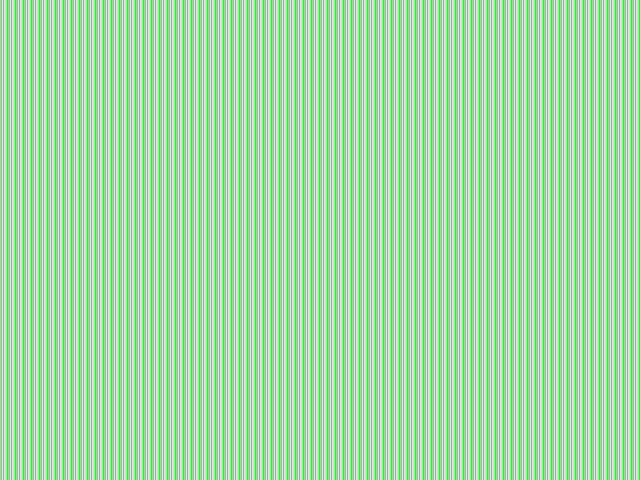

<AxesSubplot:>

In [34]:
time_series_df.plot()

# Прогнозування процесу ARMA(3, 3)

## Створення матриці вимірів

In [35]:
time_series_features_object = TimeSeriesFeatures("time_series.txt", "ma_part.txt")
time_series = time_series_features_object.time_series
ma_part = time_series_features_object.ma_part
y, feature_matrix = time_series_features_object.create_feature_matrix(ar = 3, ma = 3)

In [36]:
feature_matrix.head()

,intercept,y(k-1),y(k-2),y(k-3),v(k),v(k-1),v(k-2),v(k-3)
0,1.0,-0.51188,1.52110,0.67641,1.15019,-0.51188,1.52110,0.67641
1,1.0,2.06598,-0.51188,1.52110,-0.59072,1.15019,-0.51188,1.52110
2,1.0,0.75197,2.06598,-0.51188,-0.76877,-0.59072,1.15019,-0.51188
3,1.0,-1.10525,0.75197,2.06598,-0.33501,-0.76877,-0.59072,1.15019
4,1.0,0.61810,-1.10525,0.75197,0.09300,-0.33501,-0.76877,-0.59072


In [37]:
y[:5]

array([ 2.06598,  0.75197, -1.10525,  0.6181 , -0.03794])

## МНК та залежність оцінки коефіцієнтів від зміни у часі оцінки

In [38]:
coef_history_lsm = np.zeros((97, 8))
for i in range(98):
    try:
        coef_history_lsm[i] = LeastSquaresMethod(y = y[:i], feature_matrix = feature_matrix.iloc[:i]).fit()
    except:
        continue
coef_history_lsm = pd.DataFrame(coef_history_lsm)
coef_history_lsm.columns = feature_matrix.columns
coef_history_lsm.tail(10)

,intercept,y(k-1),y(k-2),y(k-3),v(k),v(k-1),v(k-2),v(k-3)
87,-8.924395e-09,-0.044999,-0.079,0.525,1.000001,0.299999,0.4,0.3
88,-1.738332e-08,-0.044999,-0.079,0.525,1.000001,0.299999,0.4,0.3
89,-1.319080e-07,-0.045000,-0.079,0.525,1.000001,0.299999,0.4,0.3
90,-1.669366e-07,-0.044999,-0.079,0.525,1.000001,0.299999,0.4,0.3
91,-1.257594e-07,-0.044999,-0.079,0.525,1.000001,0.299999,0.4,0.3
92,-1.411208e-07,-0.044999,-0.079,0.525,1.000001,0.299999,0.4,0.3
93,-6.157277e-08,-0.044999,-0.079,0.525,1.000001,0.299999,0.4,0.3
94,-1.311291e-07,-0.044999,-0.079,0.525,1.000001,0.299999,0.4,0.3
95,-1.346203e-07,-0.044999,-0.079,0.525,1.000001,0.299999,0.4,0.3
96,-1.983632e-07,-0.044999,-0.079,0.525,1.000001,0.299999,0.4,0.3


## РМНК та залежність оцінки коефіцієнтів від зміни у часі оцінки

In [39]:
coef_history_rlsm = RecursiveLeastSquaresMethod(y = y, feature_matrix = feature_matrix).fit(full = 1)
coef_history_rlsm = pd.DataFrame(coef_history_rlsm)
coef_history_rlsm.columns = feature_matrix.columns
coef_history_rlsm.head(10)

,intercept,y(k-1),y(k-2),y(k-3),v(k),v(k-1),v(k-2),v(k-3)
0,0.246228,-0.126039,0.374537,0.166551,0.283208,-0.126039,0.374537,0.166551
1,0.333568,0.034244,0.345728,0.292799,0.245230,-0.038579,0.345728,0.292799
2,0.158164,-0.320560,-0.073542,0.551405,0.691423,0.056209,0.225316,0.551405
3,0.084641,-0.104904,-0.167179,0.336939,0.912296,0.232193,0.443196,0.515783
4,0.130191,-0.090197,-0.197942,0.349926,0.935617,0.203406,0.435829,0.470874
5,0.030538,-0.026520,-0.186593,0.417094,0.949261,0.129069,0.453736,0.454099
6,0.022567,-0.001887,-0.102436,0.410269,1.026473,0.160982,0.348434,0.431554
7,-0.000358,-0.044358,-0.079160,0.524165,0.999711,0.298025,0.399687,0.301239
8,-0.000386,-0.044392,-0.079049,0.524394,0.999828,0.298295,0.399598,0.300989
9,-0.000286,-0.044309,-0.078849,0.524203,1.000151,0.298255,0.399216,0.301051


## Графіки залежностей

In [40]:
%matplotlib notebook

<IPython.core.display.Javascript object>


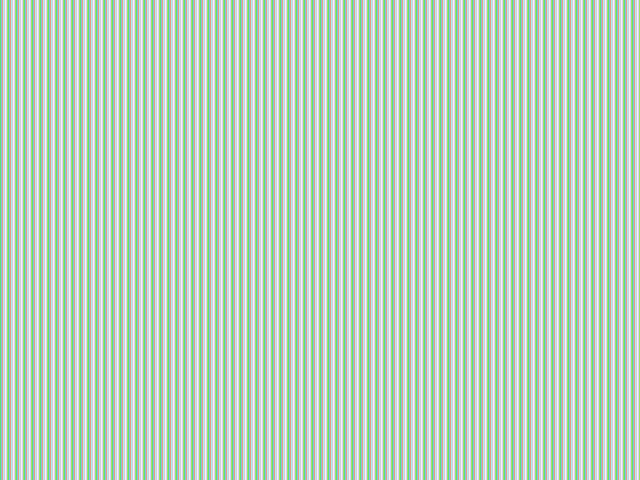

<IPython.core.display.Javascript object>


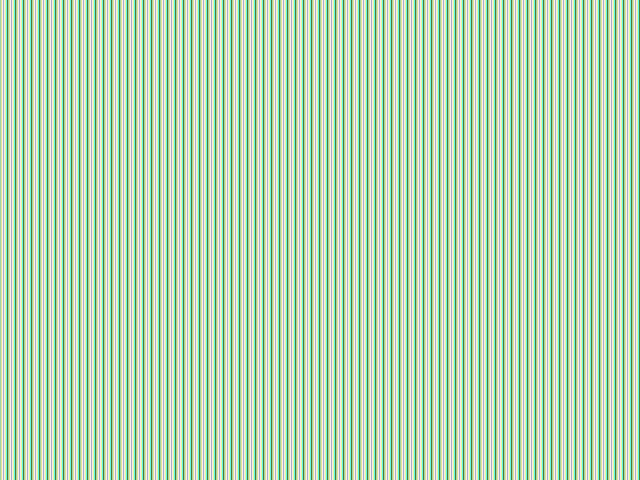

<IPython.core.display.Javascript object>


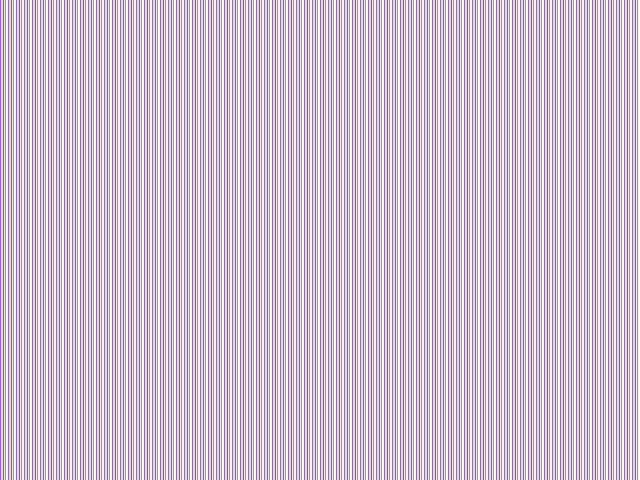

<IPython.core.display.Javascript object>


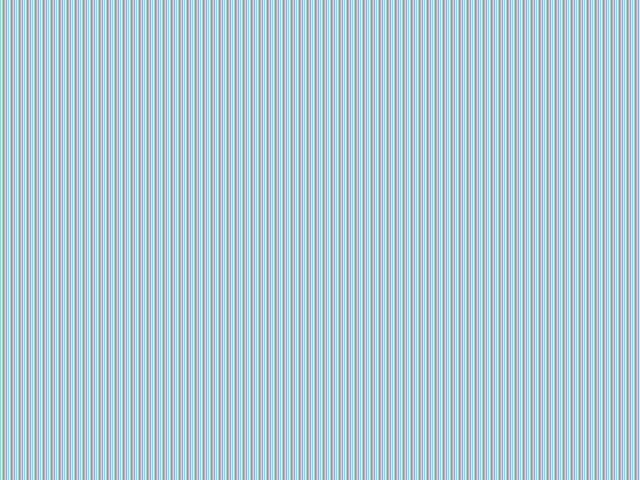

In [41]:
for k in range(4):
    plt.figure()
    plt.plot(coef_history_rlsm.iloc[:,k], label = "RLSM")
    plt.plot(coef_history_lsm.iloc[:, k], label = "LSM")
    plt.plot(np.ones(100)*a_coef[k], label = "True coefficient")
    plt.xlabel("time, $k$")
    plt.ylabel(f"coefficient, $a_{k}(k)$")
    plt.legend()
    plt.savefig(f"figures/fig_a_{k}.png", dpi=300)

<IPython.core.display.Javascript object>


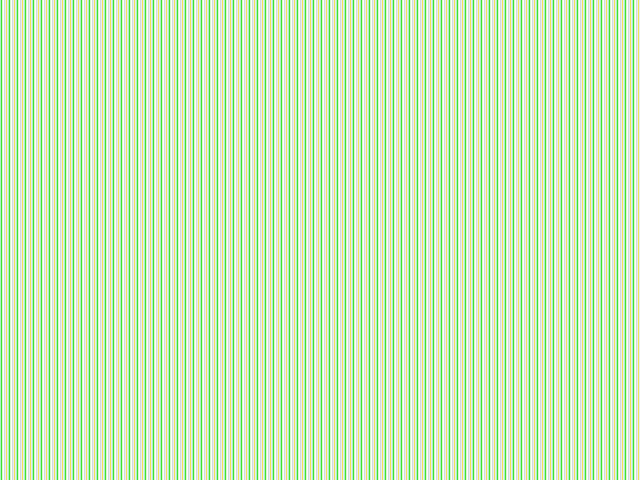

<IPython.core.display.Javascript object>


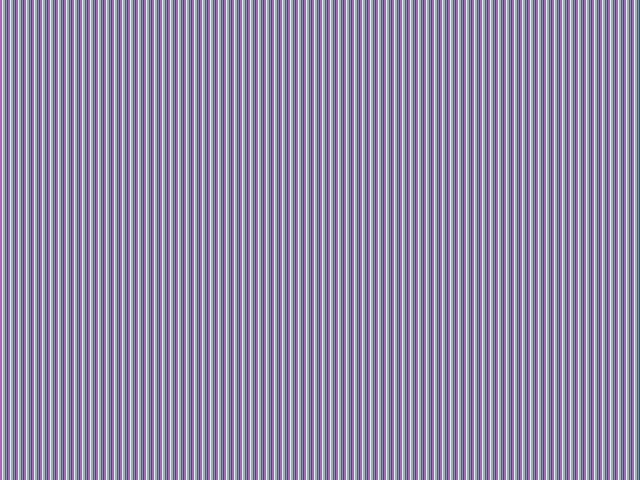

<IPython.core.display.Javascript object>


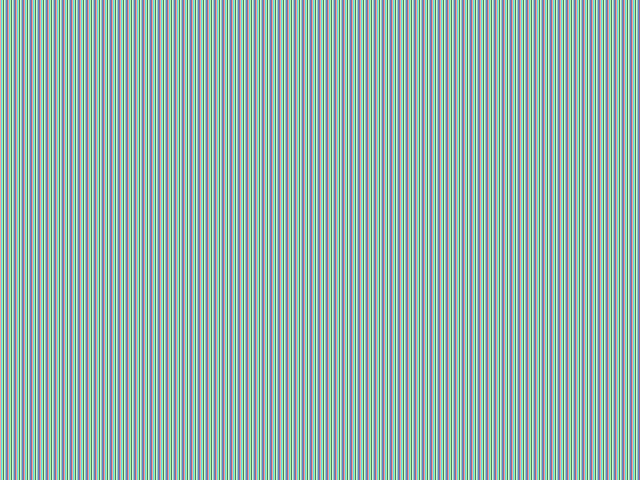

<IPython.core.display.Javascript object>


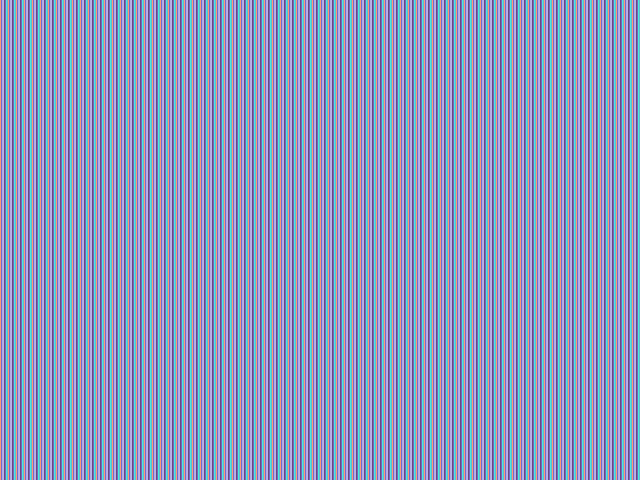

In [42]:
for k in range(4, 8):
    plt.figure()
    plt.plot(coef_history_rlsm.iloc[:,k], label = "RLSM")
    plt.plot(coef_history_lsm.iloc[:, k], label = "LSM")
    plt.plot(np.ones(100)*b_coef[k-4], label = "True coefficient")
    plt.xlabel("time, $k$")
    plt.ylabel(f"coefficient, $b_{k-4}(k)$")
    plt.legend()
    plt.savefig(f"figures/fig_b_{k-4}.png", dpi=300)

<IPython.core.display.Javascript object>


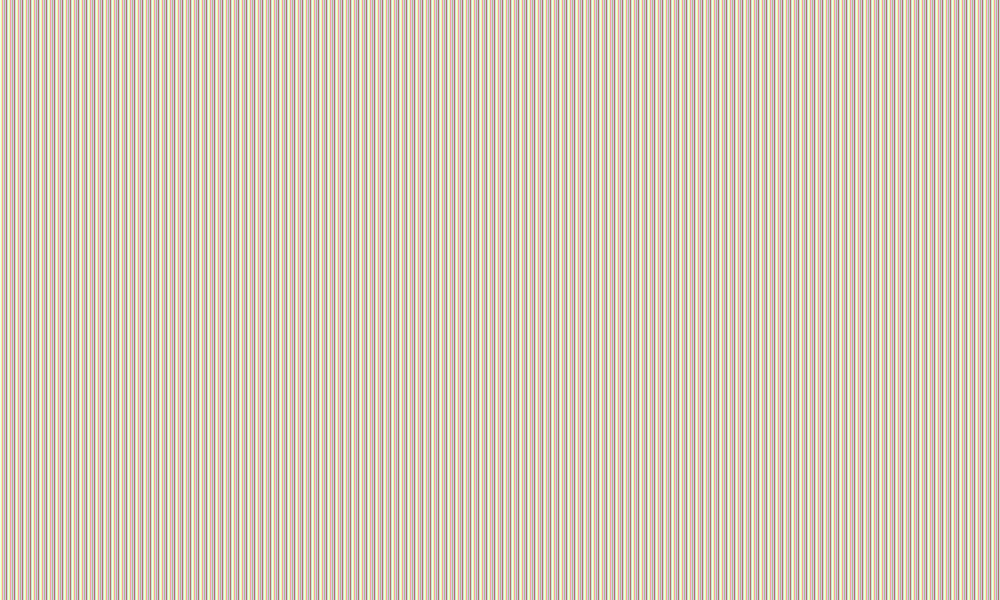

<IPython.core.display.Javascript object>


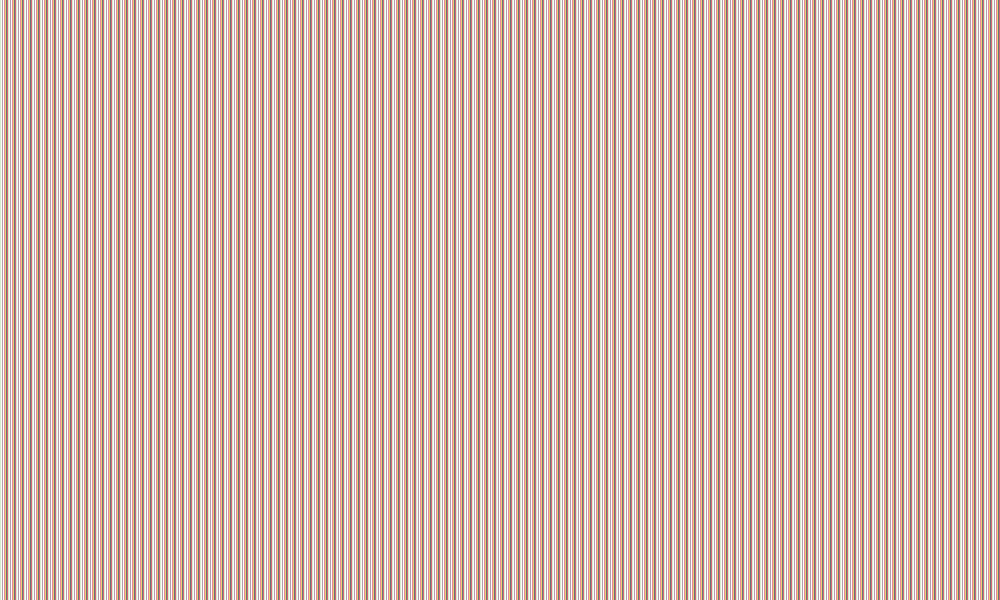

<IPython.core.display.Javascript object>


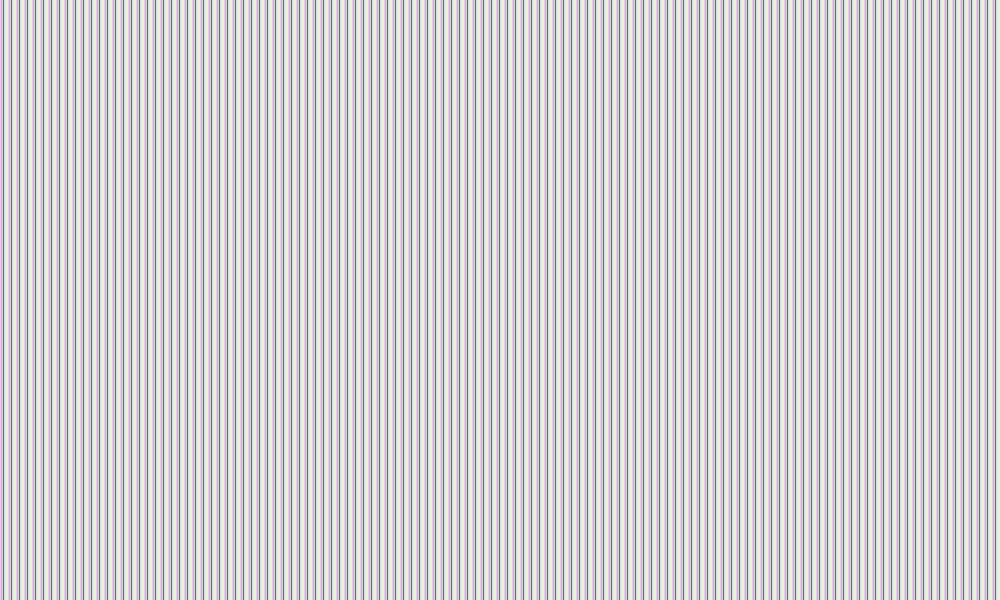

<IPython.core.display.Javascript object>


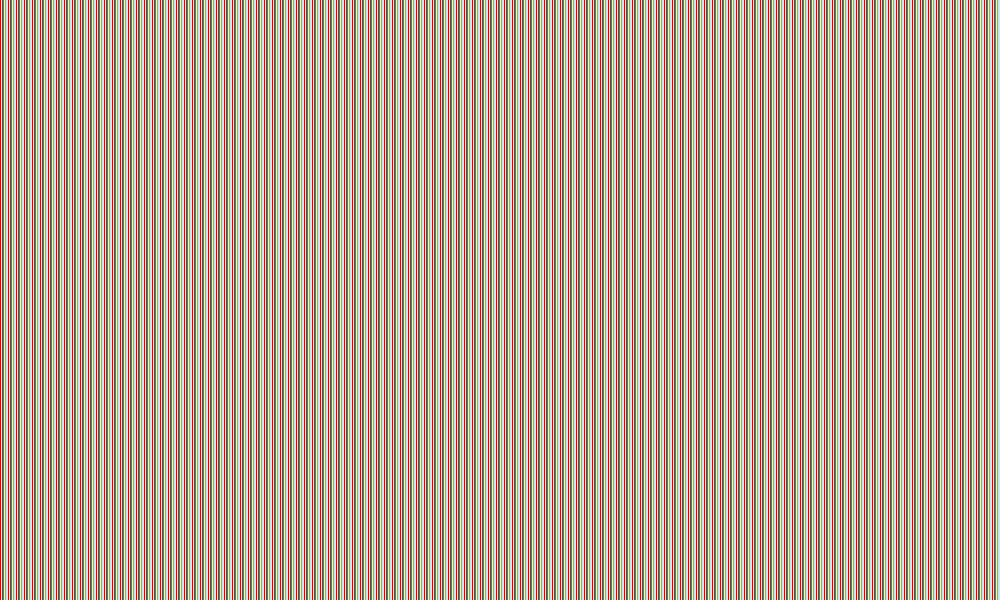

In [43]:
for k in range(4):
    plt.figure(figsize = (10, 6))
    plt.plot(coef_history_rlsm.iloc[15:,k], label = "RLSM")
    plt.plot(coef_history_lsm.iloc[15:, k], label = "LSM")
    plt.plot(np.arange(15, 98), a_coef[k]*np.ones(83), label = "True coefficient")
    plt.xlabel("time, $k$")
    plt.ylabel(f"coefficient, $a_{k}(k)$")
    plt.legend()
    plt.savefig(f"figures/fig_a_{k}_omitted.png", dpi=400)

<IPython.core.display.Javascript object>


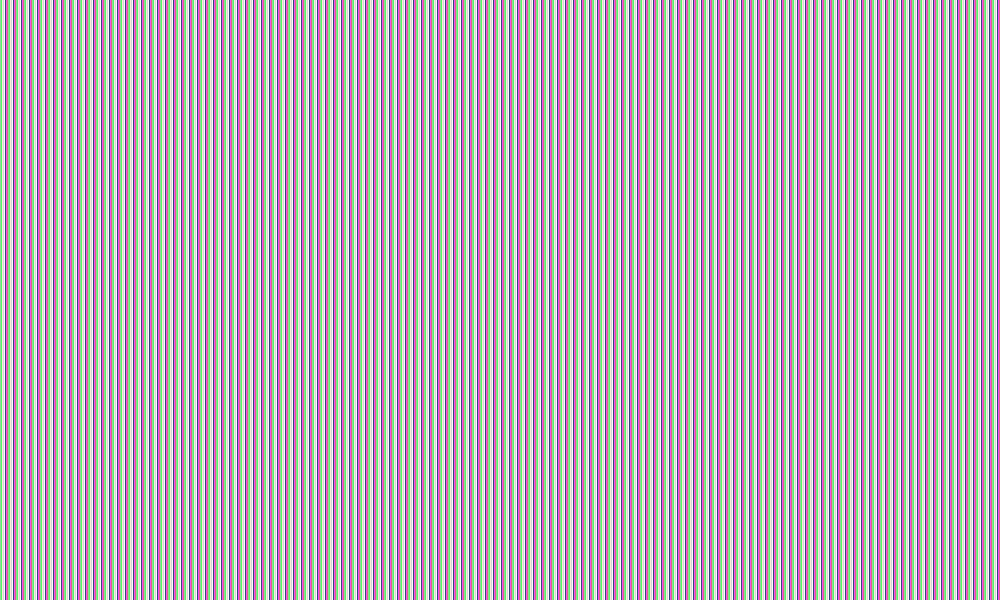

<IPython.core.display.Javascript object>


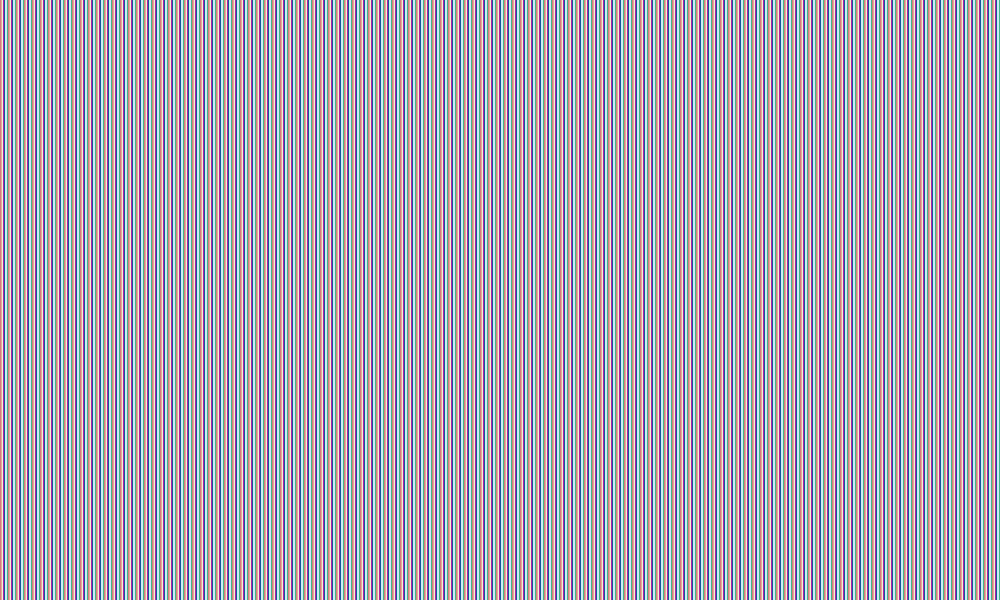

<IPython.core.display.Javascript object>


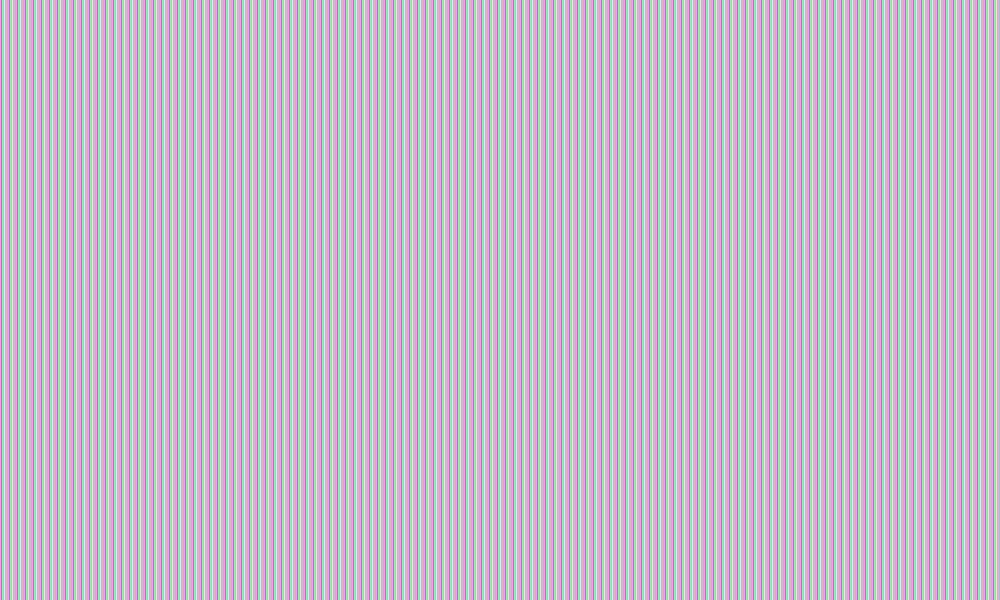

<IPython.core.display.Javascript object>


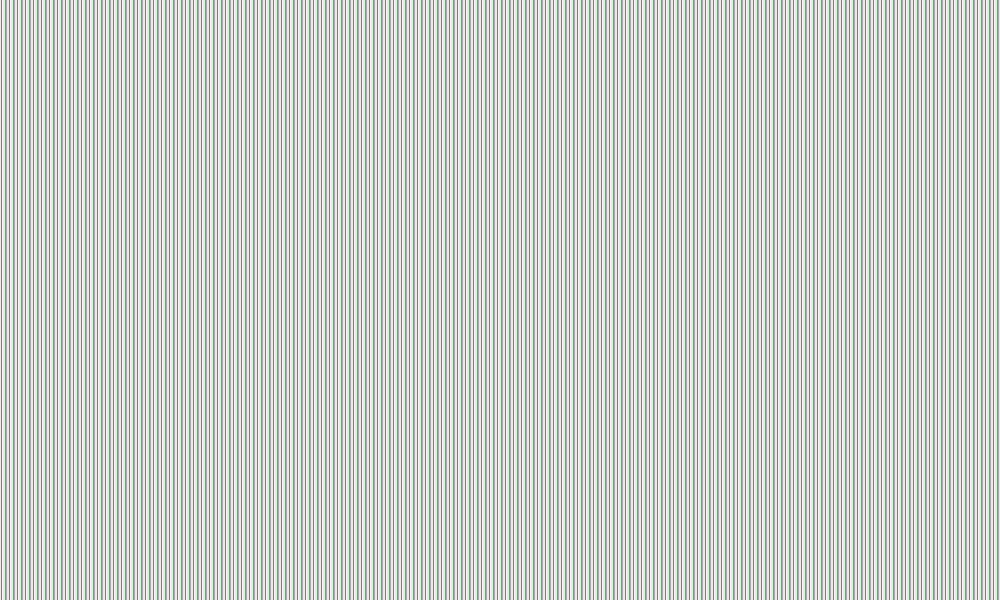

In [44]:
for k in range(4, 8):
    plt.figure(figsize = (10, 6))
    plt.plot(coef_history_rlsm.iloc[15:,k], label = "RLSM")
    plt.plot(coef_history_lsm.iloc[15:, k], label = "LSM")
    plt.plot(np.arange(15, 98), np.ones(83)*b_coef[k-4], label = "True coefficient")
    plt.xlabel("time, $k$")
    plt.ylabel(f"coefficient, $b_{k-4}(k)$")
    plt.legend()
    plt.savefig(f"figures/fig_b_{k-4}_ommited.png", dpi=300)

# Прогнозування процесів ARMA(p, q)

## Отримання коефіцієнтів моделей

In [45]:
with open("arma_coef.txt", "w") as f:
    for i in range(4):
        for j in range(4):
            f.write(f"ARMA({i}, {j})\n")
            y, feature_matrix = time_series_features_object.create_feature_matrix(ar = i, ma = j)
            temp_mls = LeastSquaresMethod(y = y, feature_matrix = feature_matrix).fit()
            f.write("MLS: \n")
            np.savetxt(f, temp_mls, "%.5f")
            temp_rmls = RecursiveLeastSquaresMethod(y = y, feature_matrix = feature_matrix).fit()
            f.write("RMLS: \n")
            np.savetxt(f, temp_rmls, "%.5f")
            f.write("\n")

## Отримання основних статистик

In [51]:
RSS_lsm_arr = []
R_2_lsm_arr = []
IKA_lsm_arr = []
RSS_rlsm_arr = []
R_2_rlsm_arr = []
IKA_rlsm_arr = []
with open("metrics.txt", "w") as f:
    for i in range(4):
        for j in range(4):
            f.write(f"ARMA({i}, {j})\n")
            y, feature_matrix = time_series_features_object.create_feature_matrix(ar = i, ma = j)
            temp_mls = LeastSquaresMethod(y = y, feature_matrix = feature_matrix).fit()
            f.write("MLS: \n")
            time_series_temp = TimeSeries(
                                        a_coef=temp_mls[:i+1],
                                        b_coef=temp_mls[i+1:i+j+2], 
                                        ma_part=ma_part)
            time_series_temp.time_series_generate()
            rss = RSS(time_series, time_series_temp.time_series.T)
            f.write(f"RSS: {rss}\n")
            RSS_lsm_arr.append(rss)
            r_sq = R_squared(time_series, time_series_temp.time_series.T)
            f.write(f"R^2: {r_sq}\n")
            R_2_lsm_arr.append(r_sq)
            ika = IKA(time_series, time_series_temp.time_series.T, ar = i, ma = j)
            IKA_lsm_arr.append(ika)
            f.write(f"IKA: {ika}\n")
            
            
            temp_rmls = RecursiveLeastSquaresMethod(y = y, feature_matrix = feature_matrix).fit().reshape((i+j+2,1))
            f.write("\nRMLS: \n")
            time_series_temp = TimeSeries(
                                        a_coef=temp_rmls[:i+1],
                                        b_coef=temp_rmls[i+1:i+j+2], 
                                        ma_part=ma_part)
            time_series_temp.time_series_generate()
            rss = RSS(time_series, time_series_temp.time_series.T)
            f.write(f"RSS: {rss}\n")
            RSS_rlsm_arr.append(rss)
            r_sq = R_squared(time_series, time_series_temp.time_series.T)
            f.write(f"R^2: {r_sq}\n")
            R_2_rlsm_arr.append(r_sq)
            ika = IKA(time_series, time_series_temp.time_series.T, ar = i, ma = j)
            f.write(f"IKA: {ika}\n")
            IKA_rlsm_arr.append(ika)
            f.write("\n")

## Графіки отриманих статистик

In [63]:
labels = np.array([[f"ARMA({i}, {j})" for j in range(4)] for i in range(4)]).reshape(1, 16)

### RSS

<IPython.core.display.Javascript object>


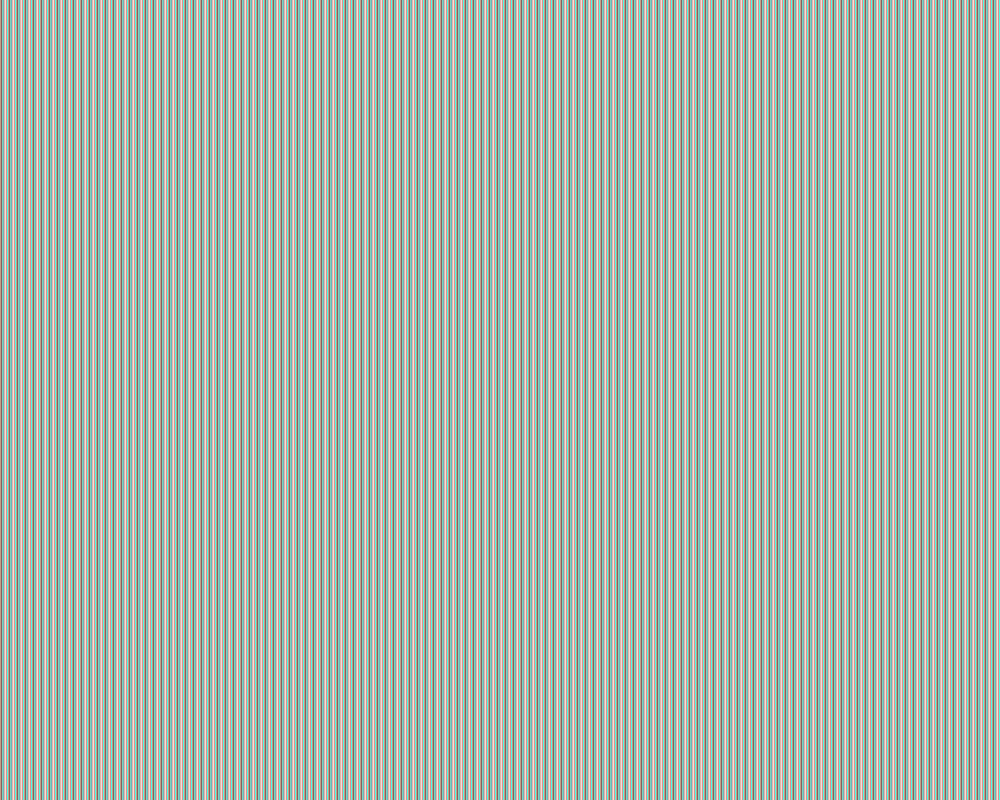

In [77]:
plt.figure(figsize = (10,8))
plt.plot(range(16),RSS_lsm_arr,"-o", label = "LMS")
plt.plot(range(16),RSS_rlsm_arr,"-o", label = "RLMS")
plt.xticks(range(16),labels[0].tolist(), rotation = 45)
plt.legend()
plt.title("RSS")
plt.savefig("figures/RSS.png")

### $R^2$

<IPython.core.display.Javascript object>


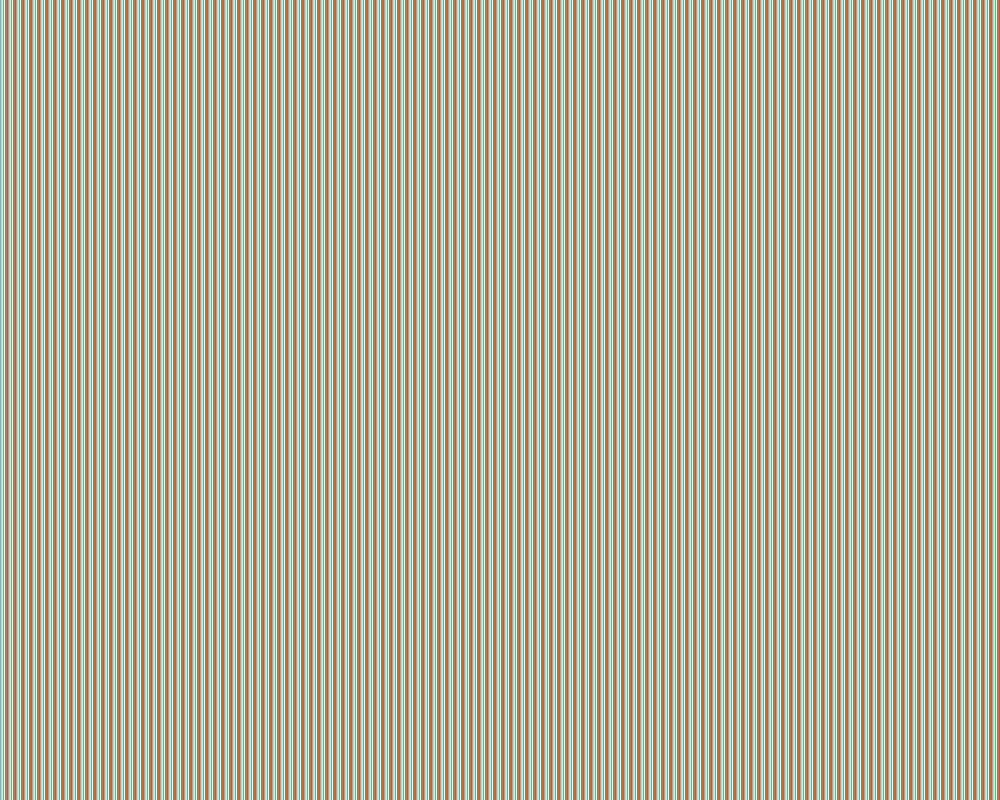

In [78]:
plt.figure(figsize = (10,8))
plt.plot(range(16),R_2_lsm_arr, "-o",label = "LMS")
plt.plot(range(16),R_2_rlsm_arr, "-o", label = "RLMS")
plt.xticks(range(16),labels[0].tolist(), rotation = 45)
plt.legend()
plt.title("$R^2$")
plt.savefig("figures/R_2.png")

### IKA

<IPython.core.display.Javascript object>


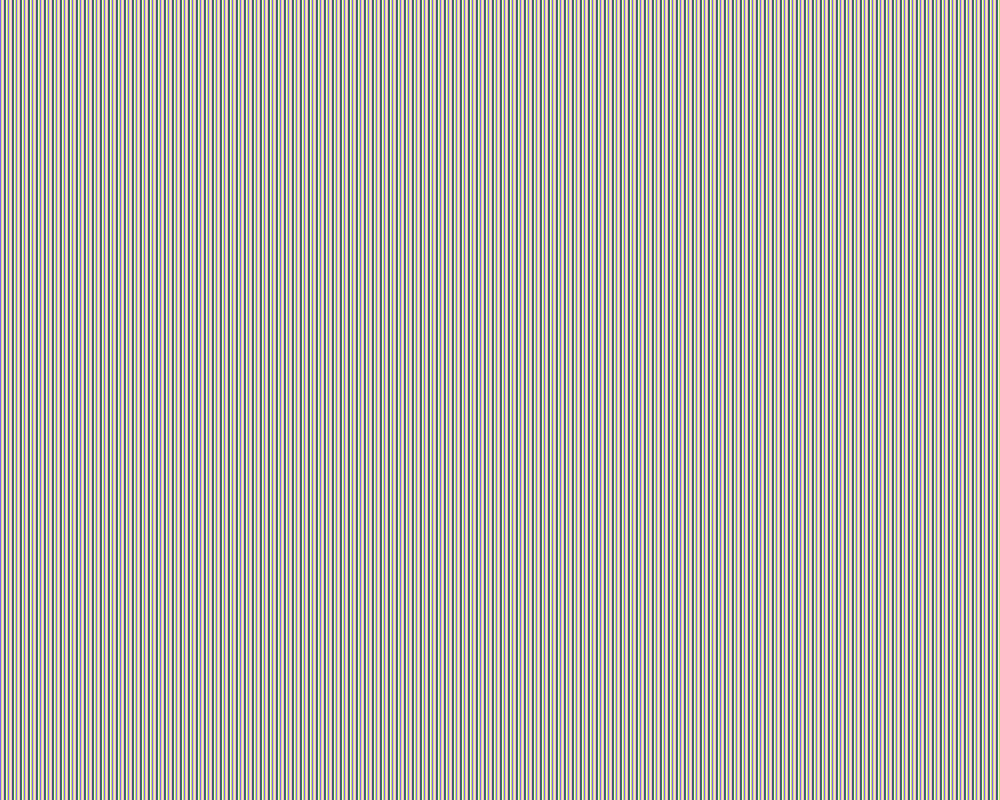

In [80]:
plt.figure(figsize = (10,8))
plt.plot(range(16),IKA_lsm_arr, "-o", label = "LMS")
plt.plot(range(16),IKA_rlsm_arr, "-o", label = "RLMS")
plt.xticks(range(16),labels[0].tolist(), rotation = 45)
plt.legend()
plt.title("IKA")
plt.savefig("figures/IKA.png")